# Machine Learning Capstone

#### Bank Marketing Dataset

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## 1. Analysis

### 1.1 Data exploration

#### 1.1.1 Data import

In [2]:
import pandas as pd
import csv
import numpy as np

dataset_df = pd.read_csv("dataset.csv", sep=';', engine='python')

print(dataset_df.columns.values)

pd.set_option('display.max_columns', None)

['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed'
 'y']


Printing first 5 rows of the data.

In [3]:
dataset_df.shape

(41188, 21)

In [4]:
dataset_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
dataset_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### 1.1.2 Descriptive analysis

Getting descriptive statistics about data.

In [6]:
dataset_df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


Visualizing of how many people subscribed to a term deposit (the dependent variable).

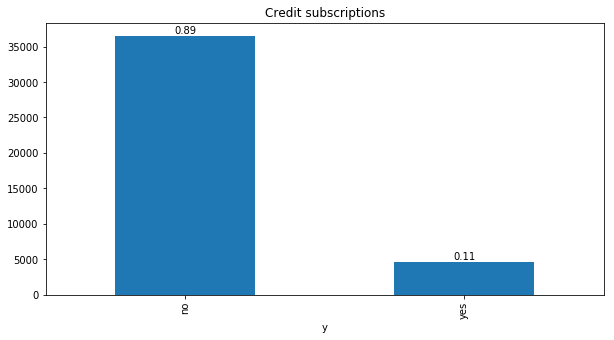

In [70]:
import matplotlib.pyplot as plt

y_df = dataset_df['y'].groupby(dataset_df['y']).count()

x_labels = ["%.2f" % (y_df.iloc[0]/dataset_df.shape[0]), "%.2f" % (y_df.iloc[1]/dataset_df.shape[0])]

ax = y_df.plot(kind='bar', figsize=(10,5), title='Credit subscriptions')

for rect, label in zip(ax.patches, x_labels):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

plt.show()

In [8]:
y_df[0]

36548

### Visualising distributions of numerical dependent variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110192198>,
      dtype=object)

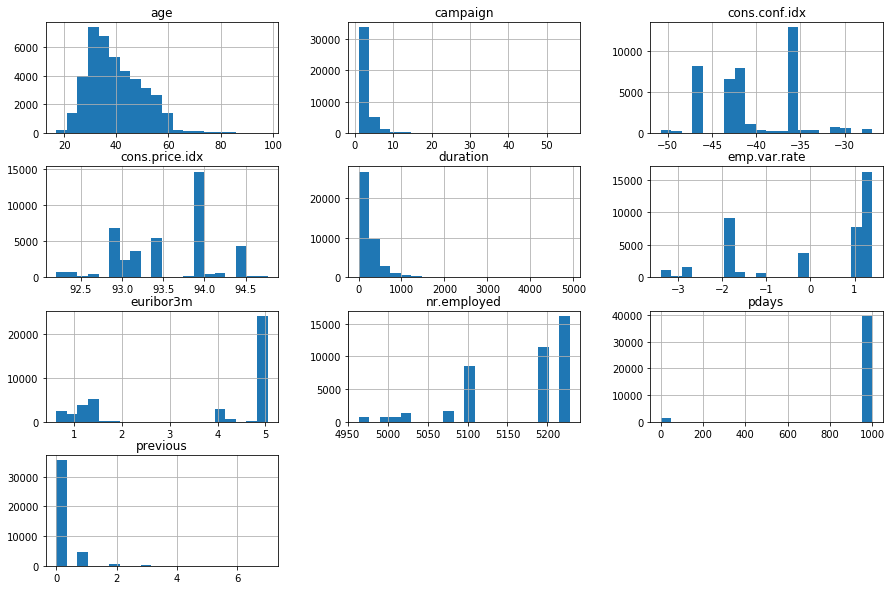

In [9]:
dataset_df.hist(figsize=(15,10), bins=20)

Visualising non numerical features.

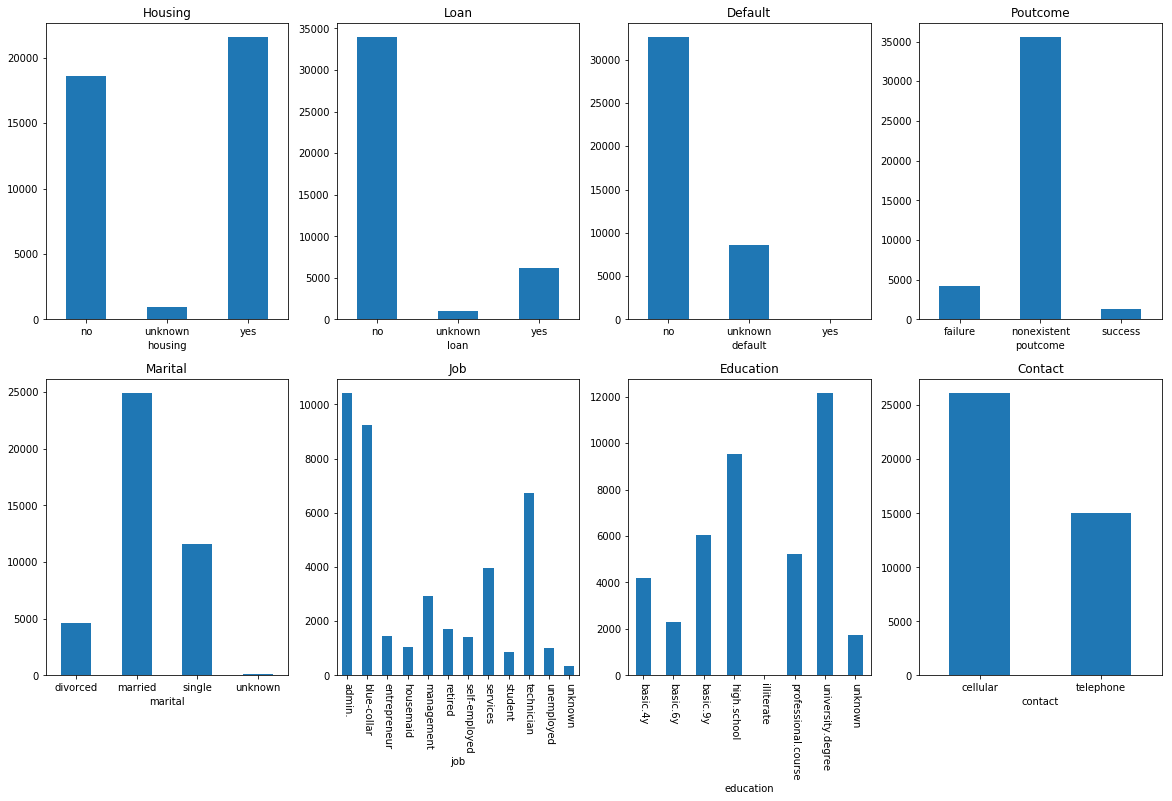

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,12))

housing_df = dataset_df['housing'].groupby(dataset_df['housing']).count()
loan_df = dataset_df['loan'].groupby(dataset_df['loan']).count()
default_df = dataset_df['default'].groupby(dataset_df['default']).count()
poutcome_df = dataset_df['poutcome'].groupby(dataset_df['poutcome']).count()
marital_df = dataset_df['marital'].groupby(dataset_df['marital']).count()
job_df = dataset_df['job'].groupby(dataset_df['job']).count()
education_df = dataset_df['education'].groupby(dataset_df['education']).count()
contact_df = dataset_df['contact'].groupby(dataset_df['contact']).count()

housing_df.plot(ax=axes[0,0], kind='bar', title = 'Housing', rot=0)
loan_df.plot(ax=axes[0,1], kind='bar', title = 'Loan', rot=0)
default_df.plot(ax=axes[0,2], kind='bar', title = 'Default', rot=0)
poutcome_df.plot(ax=axes[0,3], kind='bar', title = 'Poutcome', rot=0)
marital_df.plot(ax=axes[1,0], kind='bar', title = 'Marital', rot=0)
job_df.plot(ax=axes[1,1], kind='bar', title = 'Job', rot=270)
education_df.plot(ax=axes[1,2], kind='bar', title = 'Education', rot=270)
contact_df.plot(ax=axes[1,3], kind='bar', title = 'Contact', rot=0)

plt.subplots_adjust(wspace=None, hspace=None)
plt.show()

### 1.3 Benchmark

As a benchmark model I will assume that all clients subscribed to a product.

In [11]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
#print income
TP = y_df[1]
print(TP)
FP = y_df[0]
print(FP)

# TODO: Calculate accuracy, precision and recall
accuracy = float(TP)/(float(TP)+float(FP))
recall = float(TP)/float(TP)
precision = float(TP)/(float(TP)+float(FP))

# F-score using beta = 2 
fscore = (1 + pow(2, 2)) * precision * recall / ((pow(2, 2) * precision) + recall)
#print fscore

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}, Precision: {:.4f}, Recall: {:.4f}]".format(accuracy, fscore, precision, recall))

4640
36548
Naive Predictor: [Accuracy score: 0.1127, F-score: 0.3883, Precision: 0.1127, Recall: 1.0000]


## 6 Transforming data

In [12]:
dataset_transformed_df = dataset_df.copy()

### 6.1Transforming skewed distributions to normal distributions.

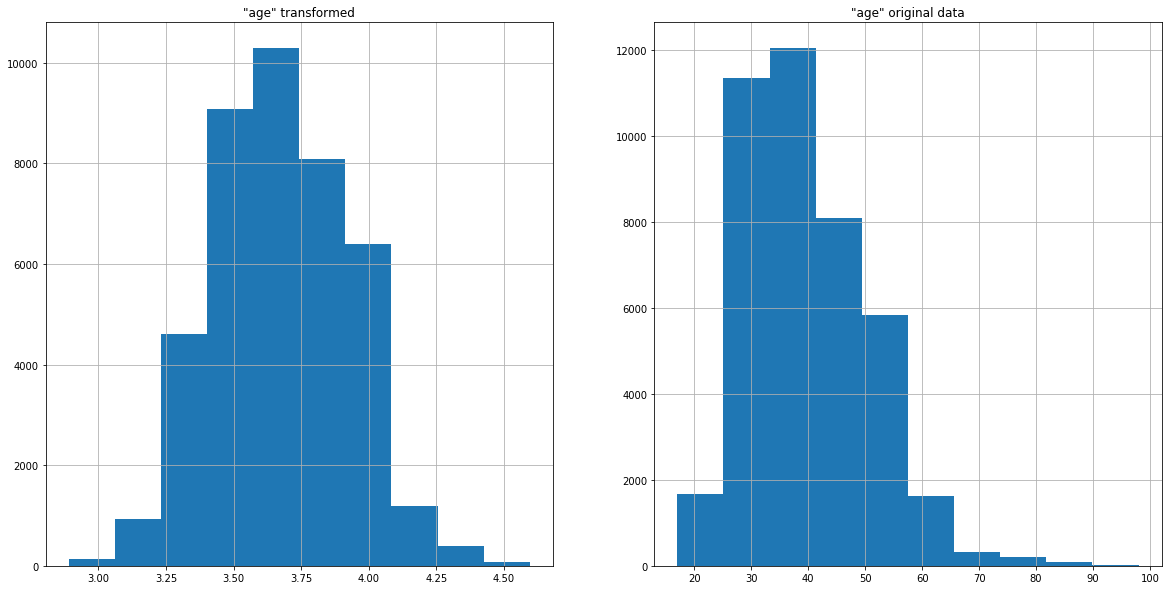

In [13]:
dataset_transformed_df['age'] = np.log1p(dataset_transformed_df['age'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax1 = dataset_transformed_df['age'].hist(ax=axes[0])
ax1.title.set_text('"age" transformed')

ax2 = dataset_df['age'].hist(ax=axes[1])
ax2.title.set_text('"age" original data')

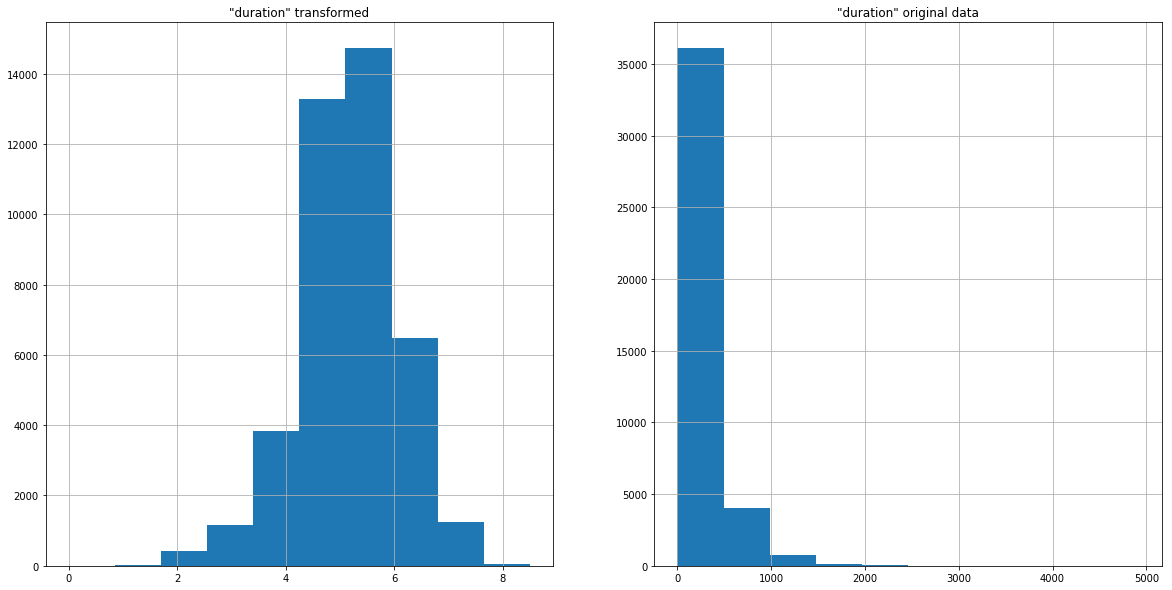

In [14]:
dataset_transformed_df['duration'] = np.log1p(dataset_transformed_df['duration'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax1 = dataset_transformed_df['duration'].hist(ax=axes[0])
ax1.title.set_text('"duration" transformed')
ax2 = dataset_df['duration'].hist(ax=axes[1])
ax2.title.set_text('"duration" original data')

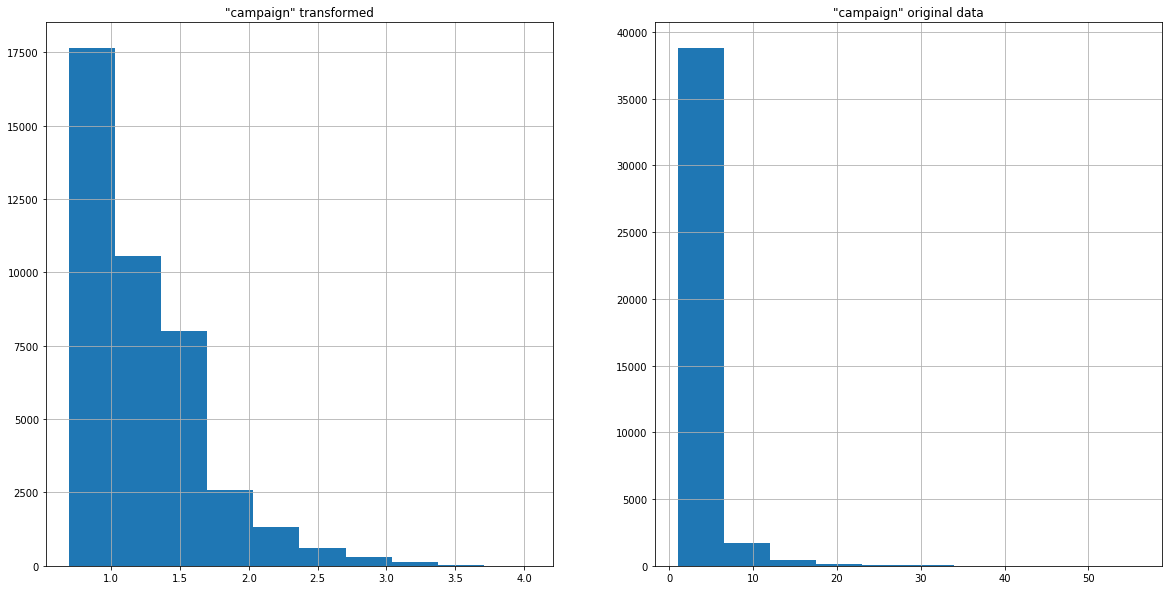

In [15]:
dataset_transformed_df['campaign'] = np.log1p(dataset_transformed_df['campaign'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax1 = dataset_transformed_df['campaign'].hist(ax=axes[0])
ax1.title.set_text('"campaign" transformed')
ax2 = dataset_df['campaign'].hist(ax=axes[1])
ax2.title.set_text('"campaign" original data')

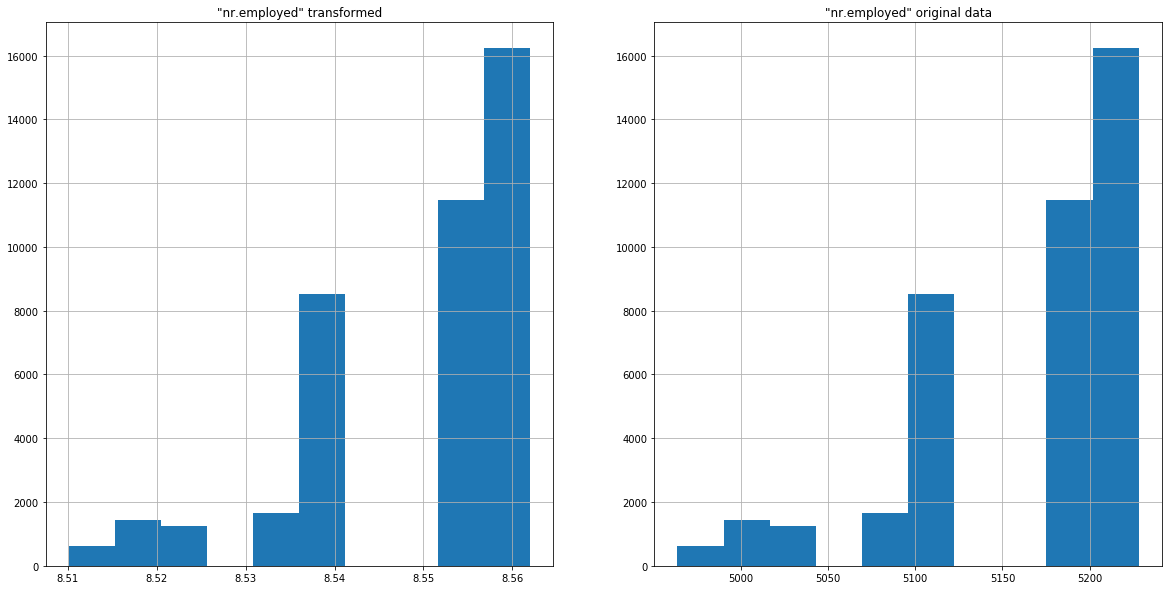

In [16]:
dataset_transformed_df['nr.employed'] = np.log1p(dataset_transformed_df['nr.employed'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax1 = dataset_transformed_df['nr.employed'].hist(ax=axes[0])
ax1.title.set_text('"nr.employed" transformed')
ax2 = dataset_df['nr.employed'].hist(ax=axes[1])
ax2.title.set_text('"nr.employed" original data')

Transforming 'y' column (dependent variable) to numerical, where yes = 1 and no = 0.

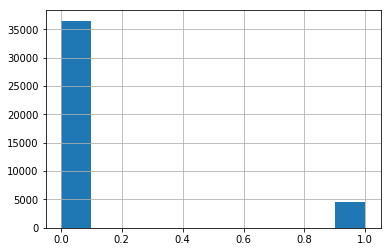

In [17]:
dataset_transformed_df['y'] = dataset_transformed_df['y'].map({'yes': 1, 'no': 0})

dataset_transformed_df['y'].hist()

### 6.2 Missing data

There are no classical missing data in this set. However, there are other yes/no features in this dataset: 'housing', 'loan', 'default', 'poutcome', which besides 'yes' and 'no' have 'unknown', what is actually missing data. Because algorithms I will use do not have missing features handling and there are to many rows with missing features, I will test two types of handling.

First would be assigning numerical values to the variables as following:
- yes / success = 1
- no / failure = -1
- unknown = 0

As I plan to scale features to be in [-1,1], I think it would be the best solution.

Second approach would be to use dummies in order to create new features for every of the variables. It will grow the number of features by 8. It isn't huge number and I am curious if it will have effect on classifier performance.

In [18]:
dataset_transformed_df['housing'] = dataset_transformed_df['housing'].map({'yes': 1, 'no': -1, 'unknown': 0})
dataset_transformed_df['loan'] = dataset_transformed_df['loan'].map({'yes': 1, 'no': -1, 'unknown': 0})
dataset_transformed_df['default'] = dataset_transformed_df['default'].map({'yes': 1, 'no': -1, 'unknown': 0})
dataset_transformed_df['poutcome'] = dataset_transformed_df['poutcome'].map({'success': 1, 'failure': -1, 'nonexistent': 0})

In [19]:
dataset_transformed_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4.043051,housemaid,married,basic.4y,-1,-1,-1,telephone,may,mon,5.568345,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0
1,4.060443,services,married,high.school,0,-1,-1,telephone,may,mon,5.010635,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0
2,3.637586,services,married,high.school,-1,1,-1,telephone,may,mon,5.424950,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0
3,3.713572,admin.,married,basic.6y,-1,-1,-1,telephone,may,mon,5.023881,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0
4,4.043051,services,married,high.school,-1,-1,1,telephone,may,mon,5.730100,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0


### 6.3 Inserting dummies

In [20]:
dummies = pd.get_dummies(dataset_transformed_df[['job', 'marital', 'education', 'contact', 'month', 'day_of_week']])

dataset_transformed_df = dataset_transformed_df.join(dummies)

dataset_transformed_df = dataset_transformed_df.drop(['job', 'marital', 'education', 'contact', 'month', 'day_of_week'], axis=1)

dataset_transformed_df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,4.043051,-1,-1,-1,5.568345,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,4.060443,0,-1,-1,5.010635,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,3.637586,-1,1,-1,5.424950,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,3.713572,-1,-1,-1,5.023881,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,4.043051,-1,-1,1,5.730100,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


## 7 Model selection

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score

def fit_predict_measure(classifier, X_train, X_test, Y_train, Y_test):
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    
    results = {'fbeta': [fbeta_score(Y_test, Y_pred, beta=2)],
               'precision': [precision_score(Y_test, Y_pred)],
               'recall': [recall_score(Y_test, Y_pred)],
               'accuracy': [accuracy_score(Y_test, Y_pred)]
              }
    
    results_df = pd.DataFrame(results)
    
    return results_df

In [22]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

rs = ShuffleSplit(n_splits=10, test_size=.25, random_state=42)

print("Multiple shuffle splits")

results_LR = pd.DataFrame()
results_RF = pd.DataFrame()
results_GNB = pd.DataFrame()
results_SVC = pd.DataFrame()
results_DT = pd.DataFrame()

accuracy_df = pd.DataFrame()

i = 2

z = 0

while i < 100:

    dataset_final_df = dataset_transformed_df.drop((dataset_transformed_df[dataset_transformed_df.y == 0]).sample(frac=.7, random_state=i).index, inplace = False).copy()

#     print("after under sampling dataset_final_df")
#     print(dataset_final_df.shape)
    dataset_final_df.reset_index(drop=True, inplace=True)

    Y = dataset_final_df['y']

    X = dataset_final_df.drop(['y'], axis=1)

    for train_index, test_index in rs.split(dataset_final_df):

        Y_train = Y[train_index]
        Y_test = Y[test_index]
        X_train = X.loc[train_index]
        X_test = X.loc[test_index]

        #Initialize models
        clf_LR = LogisticRegression(random_state=0)
        clf_RF = RandomForestClassifier(random_state=0)
        clf_GNB = GaussianNB()
        clf_SVC = svm.SVC()
        clf_DT = DecisionTreeClassifier(random_state=0)

        if results_LR.empty:
            results_LR = fit_predict_measure(clf_LR, X_train, X_test, Y_train, Y_test)
        else:
            results_LR = results_LR.append(fit_predict_measure(clf_LR, X_train, X_test, Y_train, Y_test))

        if results_RF.empty:
            results_RF = fit_predict_measure(clf_RF, X_train, X_test, Y_train, Y_test)
        else:
            results_RF = results_RF.append(fit_predict_measure(clf_RF, X_train, X_test, Y_train, Y_test))


        if results_GNB.empty:
            results_GNB = fit_predict_measure(clf_GNB, X_train, X_test, Y_train, Y_test)
        else:
            results_GNB = results_GNB.append(fit_predict_measure(clf_GNB, X_train, X_test, Y_train, Y_test))


        if results_SVC.empty:
            results_SVC = fit_predict_measure(clf_SVC, X_train, X_test, Y_train, Y_test)
        else:
            results_SVC = results_SVC.append(fit_predict_measure(clf_SVC, X_train, X_test, Y_train, Y_test))

        if results_DT.empty:
            results_DT = fit_predict_measure(clf_DT, X_train, X_test, Y_train, Y_test)
        else:
            results_DT = results_DT.append(fit_predict_measure(clf_DT, X_train, X_test, Y_train, Y_test))
            
        z += 1

    i += 10
            
print(str(z) + " Fitting and predicting done")

Multiple shuffle splits
100 Fitting and predicting done


(0, 1)

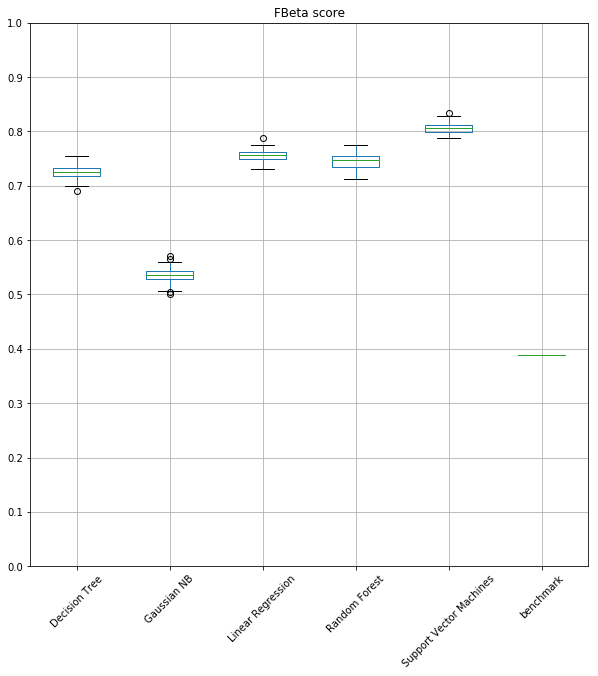

In [23]:
fbeta_df = pd.DataFrame({'Linear Regression': results_LR['fbeta'],
              'Random Forest': results_RF['fbeta'],
              'Gaussian NB': results_GNB['fbeta'],
              'Support Vector Machines': results_SVC['fbeta'],
              'Decision Tree': results_DT['fbeta'],
                        })

fbeta_df['benchmark'] = 0.3883

ax = fbeta_df.plot(kind='box', figsize=(10,10), grid=True, yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], title="FBeta score", rot=45)

ax.set_ylim(0,1)

In [24]:
fbeta_df.describe()

,Decision Tree,Gaussian NB,Linear Regression,Random Forest,Support Vector Machines,benchmark
count,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,0.725232,0.534845,0.756424,0.744918,0.806014,3.883000e-01
std,0.011146,0.013241,0.009604,0.013766,0.008872,5.579081e-17
min,0.690875,0.501511,0.731559,0.712914,0.787435,3.883000e-01
25%,0.718056,0.527794,0.749507,0.735161,0.798951,3.883000e-01
50%,0.725475,0.535586,0.755978,0.746424,0.805645,3.883000e-01
75%,0.733098,0.542593,0.762636,0.754303,0.811086,3.883000e-01
max,0.754668,0.569853,0.788662,0.774660,0.834462,3.883000e-01


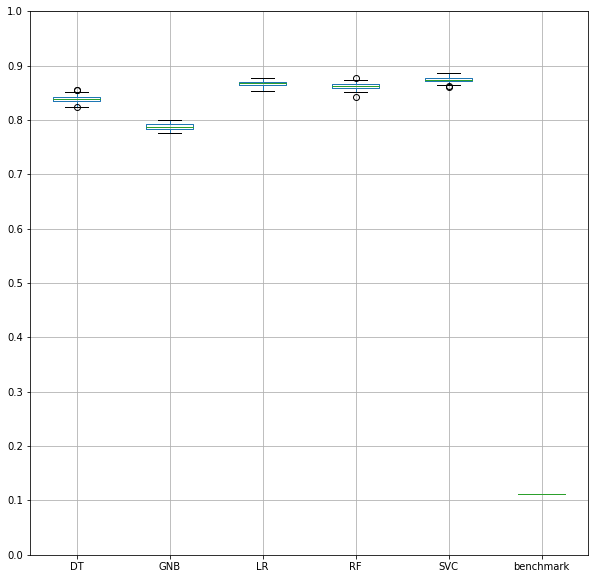

In [25]:
accuracy_df = pd.DataFrame({'LR': results_LR['accuracy'],
              'RF': results_RF['accuracy'],
              'GNB': results_GNB['accuracy'],
              'SVC': results_SVC['accuracy'],
              'DT': results_DT['accuracy']
                           })

accuracy_df['benchmark'] = 0.1127

accuracy_df.plot(kind='box', figsize=(10,10), grid=True, yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [26]:
accuracy_df.mean()

DT           0.838667
GNB          0.787234
LR           0.867044
RF           0.861858
SVC          0.874522
benchmark    0.112700
dtype: float64

In [27]:
accuracy_df.median()

DT           0.838503
GNB          0.786721
LR           0.867470
RF           0.861958
SVC          0.874135
benchmark    0.112700
dtype: float64

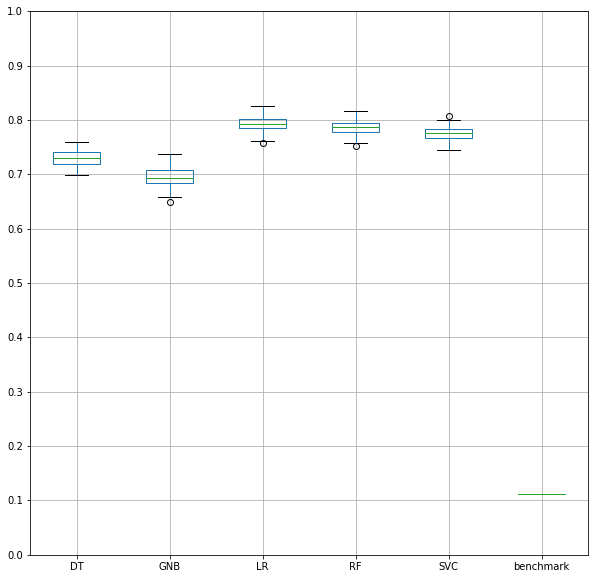

In [28]:
precision_df = pd.DataFrame({'LR': results_LR['precision'],
              'RF': results_RF['precision'],
              'GNB': results_GNB['precision'],
              'SVC': results_SVC['precision'],
              'DT': results_DT['precision']
                            })

precision_df['benchmark'] = 0.1127

precision_df.plot(kind='box', figsize=(10,10), grid=True, yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

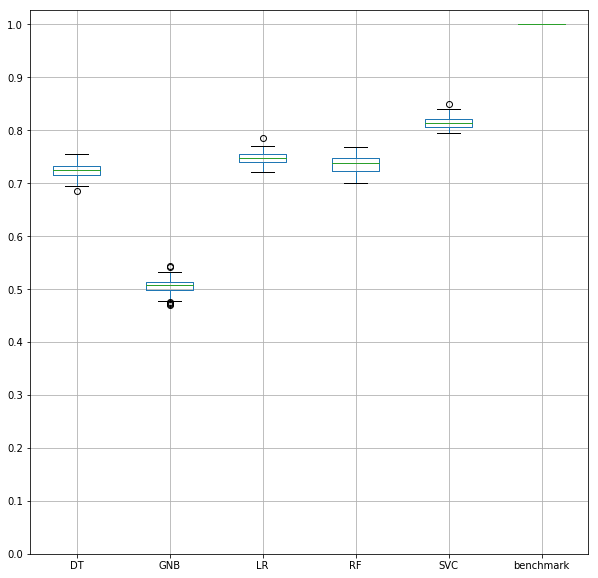

In [29]:
recall_df = pd.DataFrame({'LR': results_LR['recall'],
              'RF': results_RF['recall'],
              'GNB': results_GNB['recall'],
              'SVC': results_SVC['recall'],
              'DT': results_DT['recall'],
              })

recall_df['benchmark'] = 1

recall_df.plot(kind='box', figsize=(10,10), grid=True, yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [30]:
recall_df.mean()

DT           0.724029
GNB          0.505848
LR           0.747930
RF           0.735489
SVC          0.814308
benchmark    1.000000
dtype: float64

#### Hyperparameter tuning

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf_SVC = svm.SVC()

i =2

results_SVC = pd.DataFrame()

rs = ShuffleSplit(n_splits=2, test_size=.25, random_state=42)

dataset_final_df = dataset_transformed_df.drop((dataset_transformed_df[dataset_transformed_df.y == 0]).sample(frac=.7, random_state=i).index, inplace = False).copy()

dataset_final_df.reset_index(drop=True, inplace=True)

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.001],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

score = 'recall'

Y = dataset_final_df['y']

X = dataset_final_df.drop(['y'], axis=1)


for train_index, test_index in rs.split(dataset_final_df):

    Y_train = Y[train_index]
    Y_test = Y[test_index]
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]

    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=3,
                       scoring=score)
    clf.fit(X_train, Y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    y_true, y_pred = Y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

#         z += 1

#     i += 10
            
print(str(z) + " Fitting and predicting done")

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

Grid scores on development set:

0.088 (+/-0.006) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.822 (+/-0.009) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.804 (+/-0.006) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.673 (+/-0.022) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.149 (+/-0.019) for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.770 (+/-0.010) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.810 (+/-0.020) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.793 (+/-0.008) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.152 (+/-0.017) for {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.745 (+/-0.009) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.788 (+/-0.012) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.803 (+/-0.007) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.153 (+/-0.017) for {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
0.734 (+/-0.009) for {'C': 1000,

In [38]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

rs = ShuffleSplit(n_splits=10, test_size=.25, random_state=42)

print("Multiple shuffle splits")

results_SVC_tuned = pd.DataFrame()

i = 2

z = 0

while i < 100:

    dataset_final_df = dataset_transformed_df.drop((dataset_transformed_df[dataset_transformed_df.y == 0]).sample(frac=.7, random_state=i).index, inplace = False).copy()

    dataset_final_df.reset_index(drop=True, inplace=True)

    Y = dataset_final_df['y']

    X = dataset_final_df.drop(['y'], axis=1)

    for train_index, test_index in rs.split(dataset_final_df):

        Y_train = Y[train_index]
        Y_test = Y[test_index]
        X_train = X.loc[train_index]
        X_test = X.loc[test_index]

        #Initialize models
        clf_SVC = svm.SVC(C=1, gamma=0.1, kernel='rbf')

        if results_SVC_tuned.empty:
            results_SVC_tuned = fit_predict_measure(clf_SVC, X_train, X_test, Y_train, Y_test)
        else:
            results_SVC_tuned = results_SVC_tuned.append(fit_predict_measure(clf_SVC, X_train, X_test, Y_train, Y_test))
            
        z += 1

    i += 10
            
print(str(z) + " Fitting and predicting done")

Multiple shuffle splits
100 Fitting and predicting done


In [39]:
results_SVC_tuned.mean()

accuracy     0.873955
fbeta        0.810863
precision    0.769333
recall       0.822031
dtype: float64

In [40]:
results_SVC_tuned.median()

accuracy     0.873878
fbeta        0.811308
precision    0.769298
recall       0.821224
dtype: float64

In [41]:
results_SVC_tuned['accuracy_benchmark'] = 0.1127
results_SVC_tuned['fbeta_benchmark'] = 0.3883
results_SVC_tuned['precision_benchmark'] = 0.1127
results_SVC_tuned['recall_benchmark'] = 1

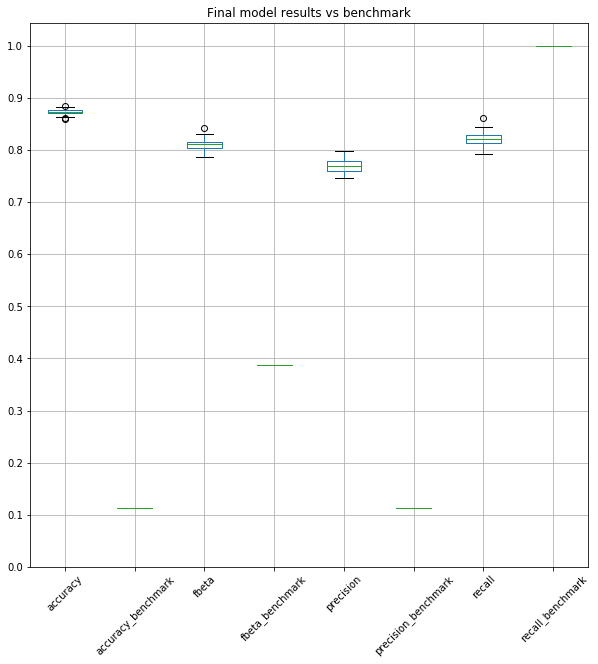

In [42]:
results_SVC_tuned = results_SVC_tuned.reindex_axis(sorted(results_SVC_tuned.columns), axis=1)

results_SVC_tuned.plot(kind='box', figsize=(10,10), grid=True, yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], rot = 45, title='Final model results vs benchmark')

In [43]:
results_SVC_tuned.describe()

,accuracy,accuracy_benchmark,fbeta,fbeta_benchmark,precision,precision_benchmark,recall,recall_benchmark
count,100.000000,1.000000e+02,100.000000,1.000000e+02,100.000000,1.000000e+02,100.000000,100.0
mean,0.873955,1.127000e-01,0.810863,3.883000e-01,0.769333,1.127000e-01,0.822031,1.0
std,0.004676,1.394770e-17,0.009383,5.579081e-17,0.011769,1.394770e-17,0.011656,0.0
min,0.860292,1.127000e-01,0.787216,3.883000e-01,0.746218,1.127000e-01,0.793220,1.0
25%,0.871059,1.127000e-01,0.804441,3.883000e-01,0.760450,1.127000e-01,0.814865,1.0
50%,0.873878,1.127000e-01,0.811308,3.883000e-01,0.769298,1.127000e-01,0.821224,1.0
75%,0.876442,1.127000e-01,0.816814,3.883000e-01,0.778583,1.127000e-01,0.829738,1.0
max,0.885414,1.127000e-01,0.841893,3.883000e-01,0.798680,1.127000e-01,0.861326,1.0


In [46]:
Y_pred = clf_SVC.predict(X_test)

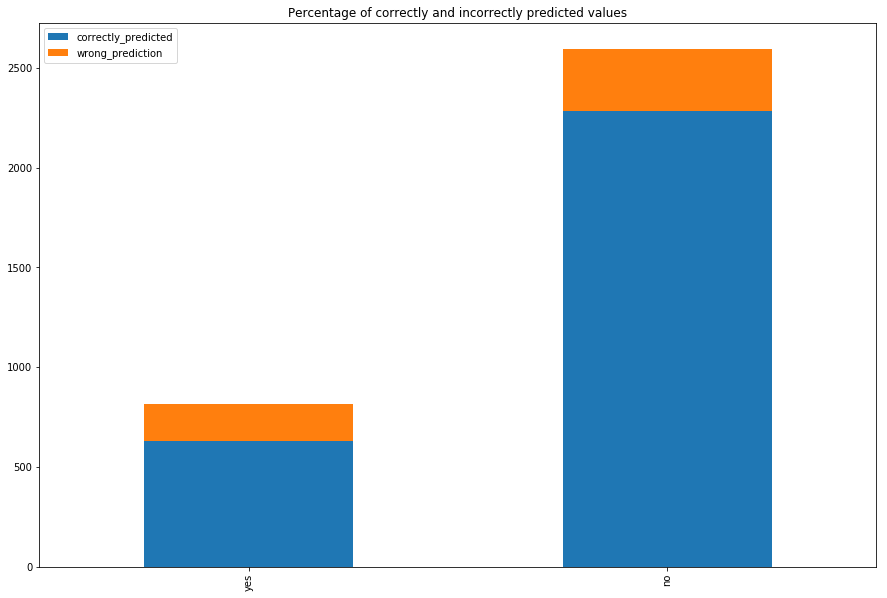

In [137]:
predicted_df = pd.DataFrame(Y_pred, columns=['Y_pred'])
Y_test.reset_index(drop=True, inplace=True)
predicted_df['Y_test'] = Y_test*2
predicted_df['diff'] = predicted_df['Y_test'] - predicted_df['Y_pred']

comparison_values_dict = {"correctly_predicted" : [predicted_df[predicted_df['diff'] == 1].count()[0] - predicted_df[predicted_df['diff'] == -1].count()[0], 
                                                   predicted_df[predicted_df['diff'] == 0].count()[0] - predicted_df[predicted_df['diff'] == 2].count()[0]],
                            "wrong_prediction": [predicted_df[predicted_df['diff'] == 2].count()[0], predicted_df[predicted_df['diff'] == -1].count()[0]]}

comparison_df = pd.DataFrame(comparison_values_dict, index=['yes', 'no'])

comparison_df.plot(kind='bar', stacked=True, title="Percentage of correctly and incorrectly predicted values", figsize=(15,10))

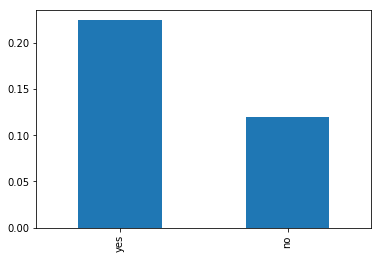

In [142]:
comparison_df['percentage_incorrect'] = comparison_df['wrong_prediction']/(comparison_df['wrong_prediction']+comparison_df['correctly_predicted'])

comparison_df['percentage_incorrect'].plot(kind='bar')

In [123]:
predicted_df[predicted_df['diff'] == 2]

,Y_pred,Y_test,diff
110,0,2,2
113,0,2,2
116,0,2,2
121,0,2,2
132,0,2,2
136,0,2,2
146,0,2,2
164,0,2,2
192,0,2,2
193,0,2,2
